In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(22)


T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_list = []
crit_95_list = []
crit_99_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 2)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 2)) #constant
dict_val = {}

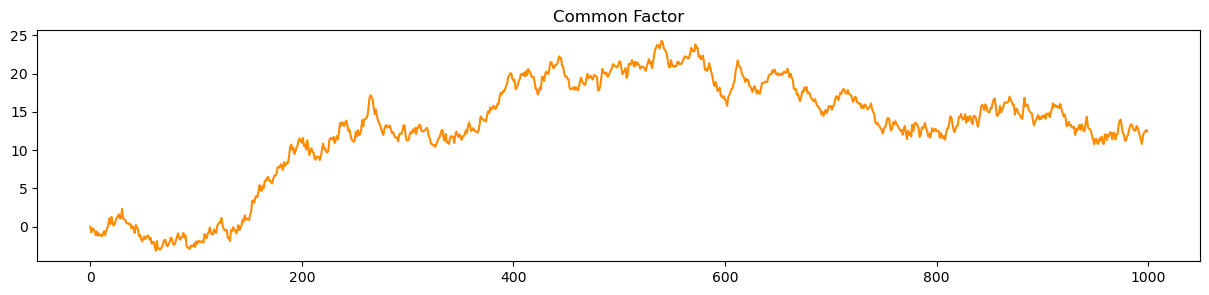

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

## N = 300

In [5]:
B = 1000
delta = 0.015

In [6]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [7]:
num_series = 2
multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=1) #constant
num_of_rw = 0.6

In [8]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [9]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

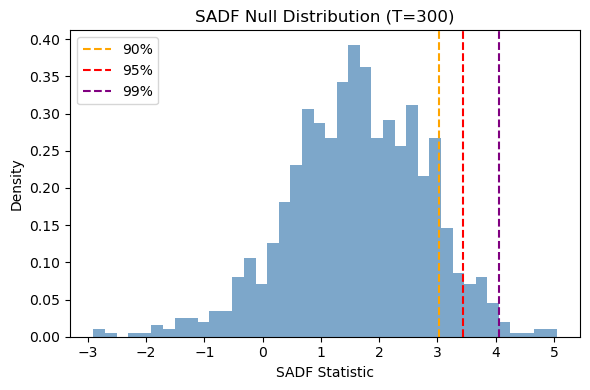

     Critical Value
90%        3.032183
95%        3.435270
99%        4.050866


beta =  [0.50814697]
alpha =  -0.1329
ADF on residuals  stat = -4.664


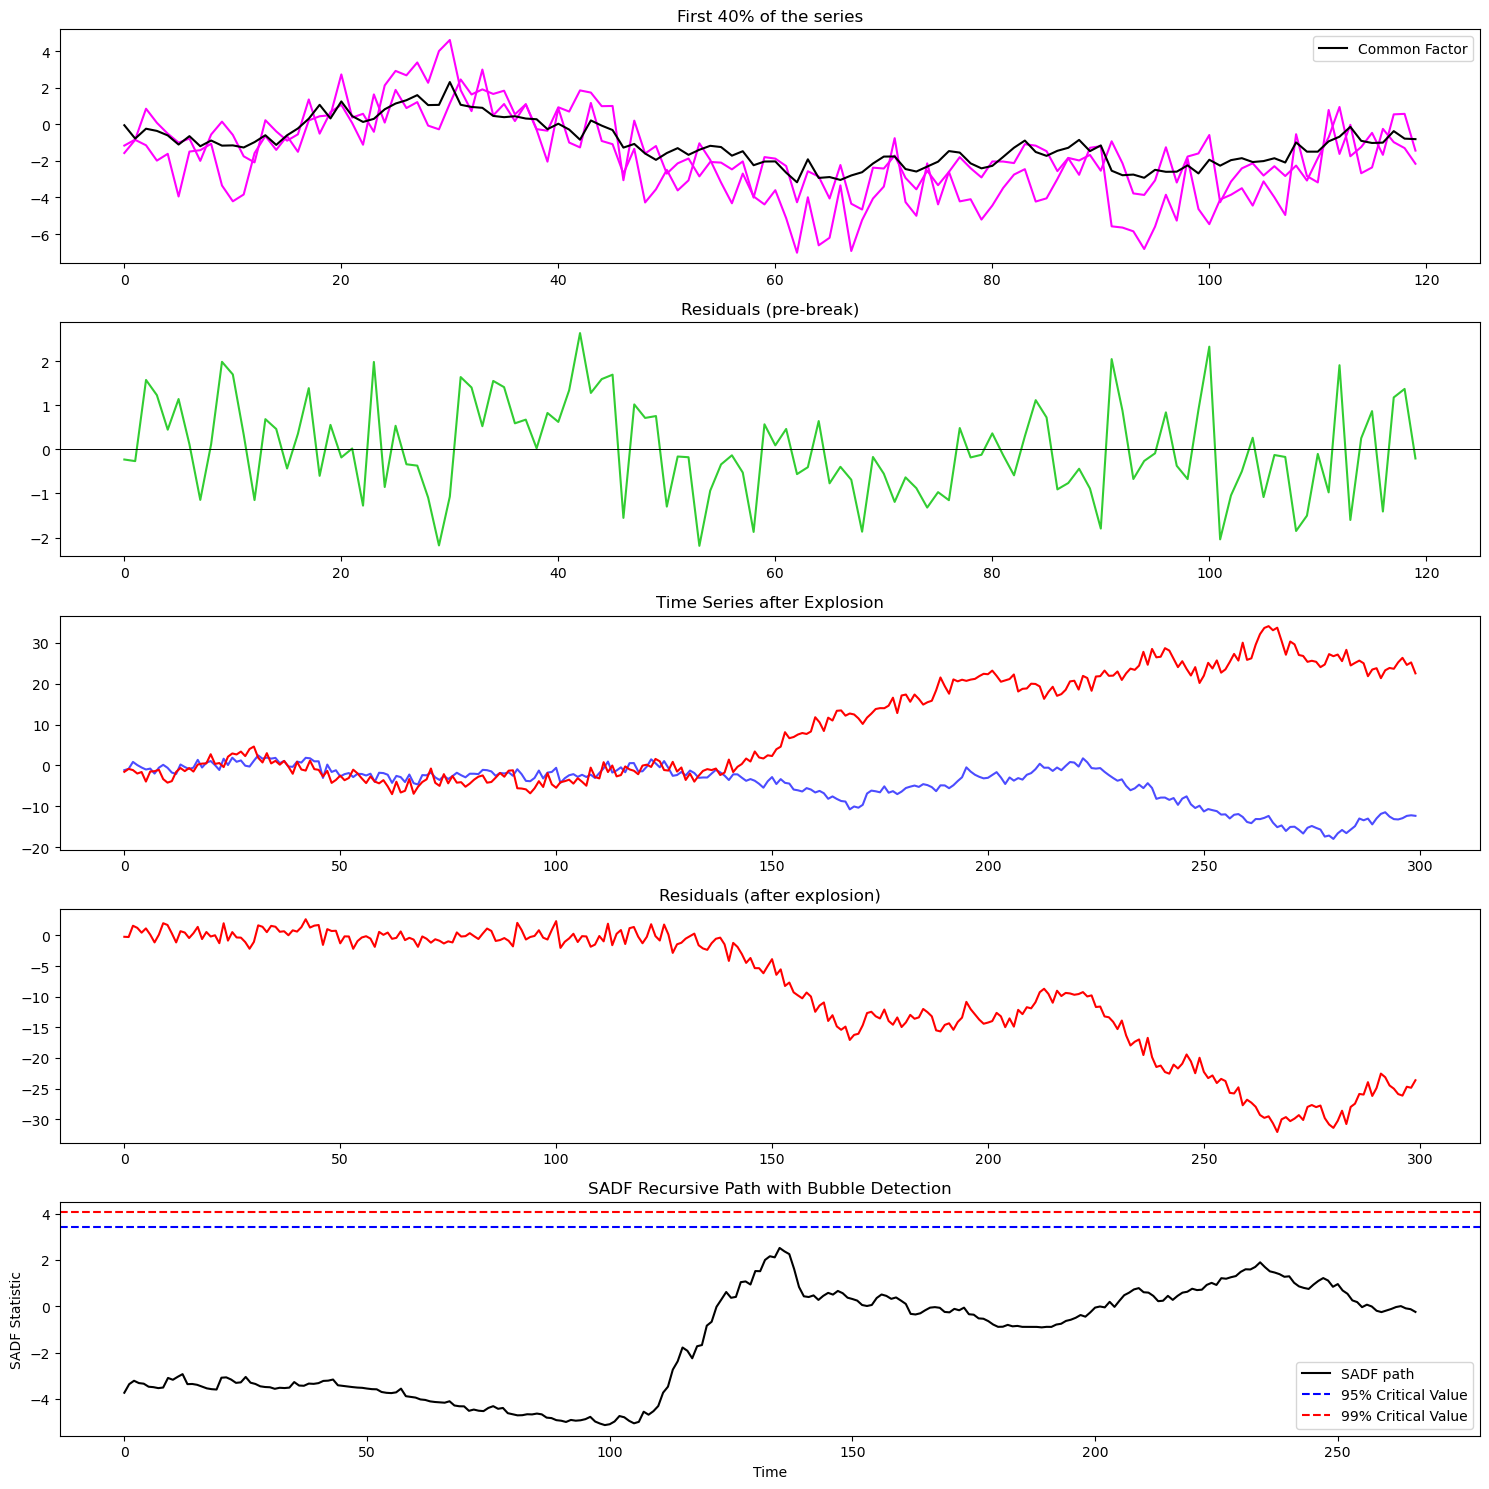

Time series is Non Explosive. SADF Value is: 2.51

Multipliers: [1.2 2. ]


In [10]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [11]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

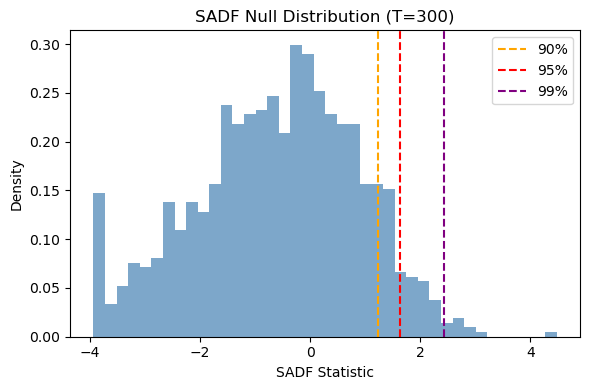

     Critical Value
90%        1.230021
95%        1.635417
99%        2.427785


beta =  [0.54945845]
alpha =  -0.0376
ADF on residuals  stat = -11.445


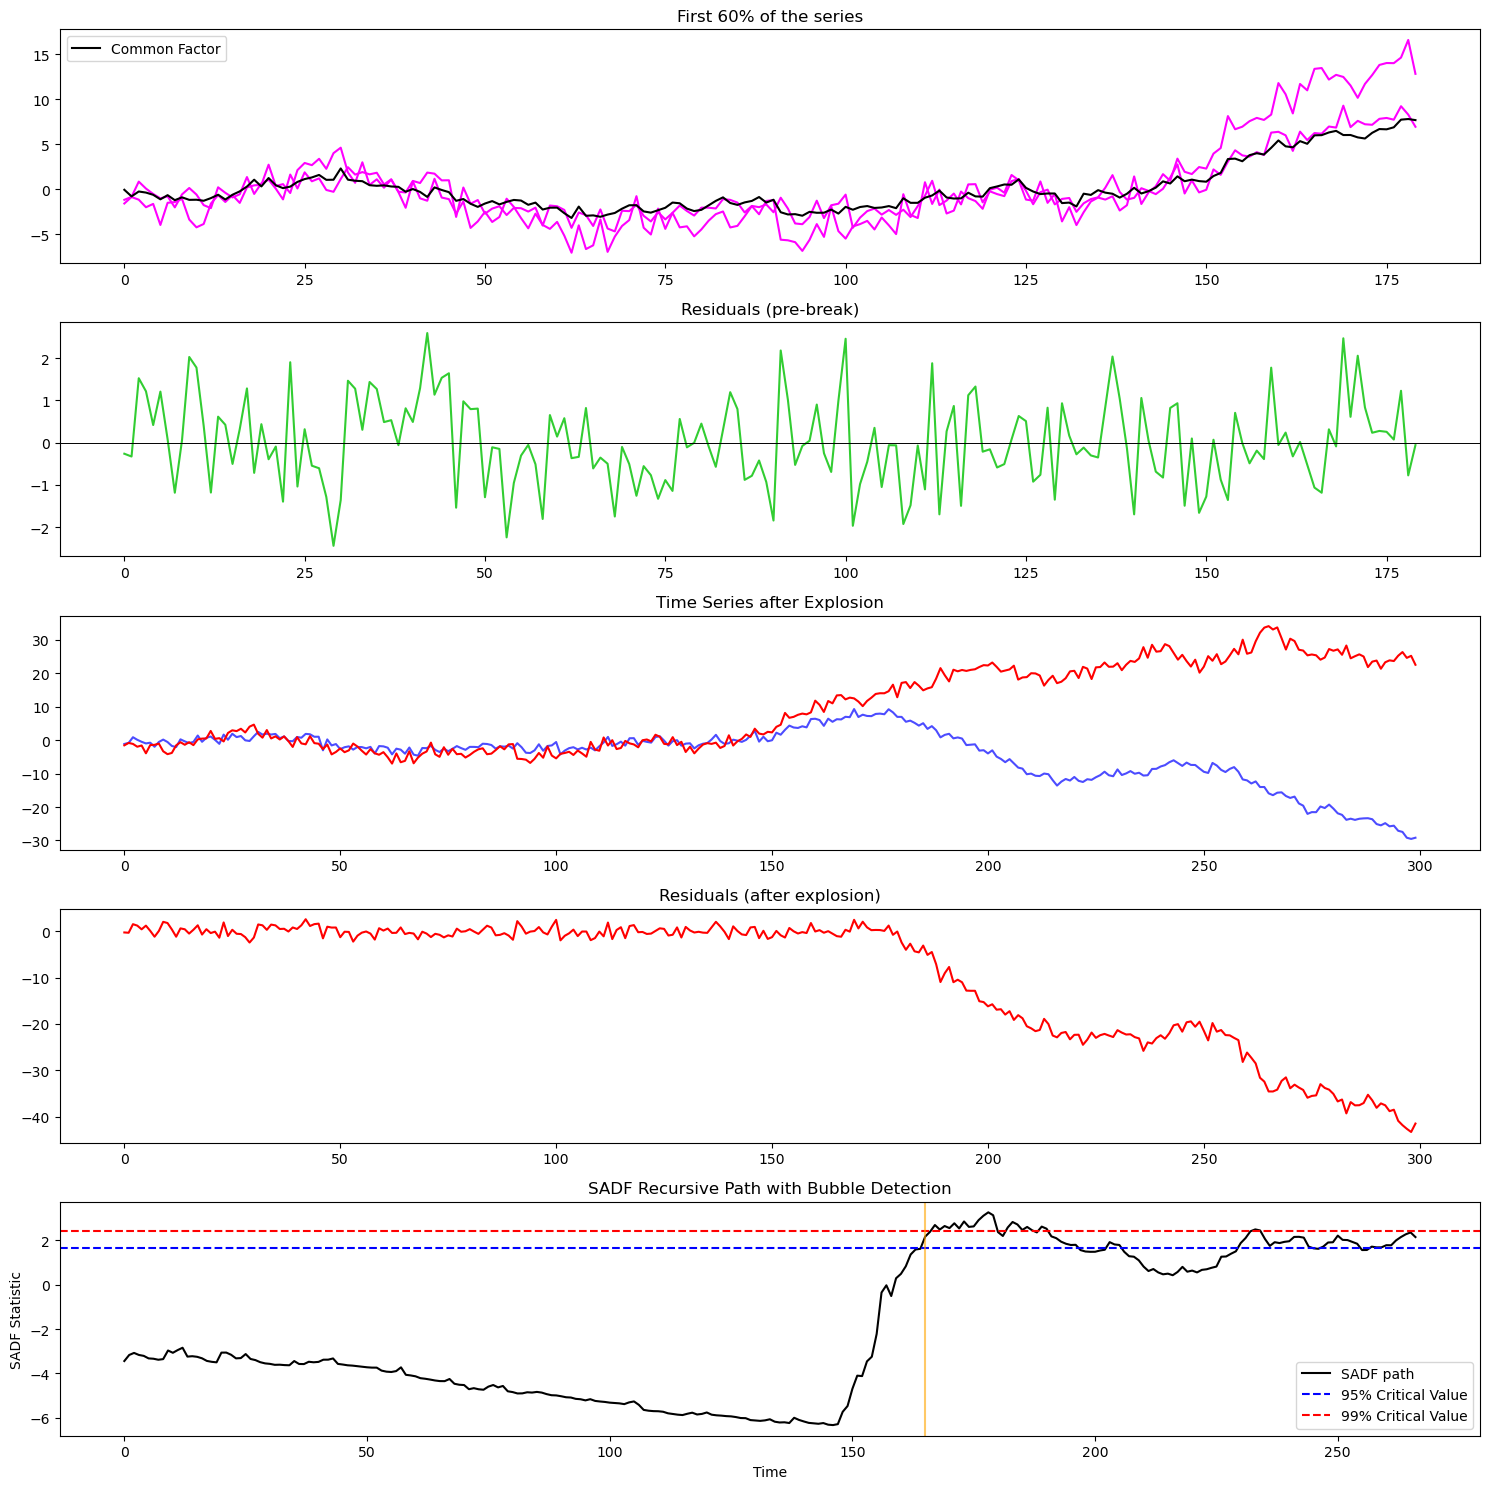

Time series is Explosive. SADF Value is: 3.26

Bubble starts at t=165
Multipliers: [1.2 2. ]


In [12]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [13]:
# 3

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

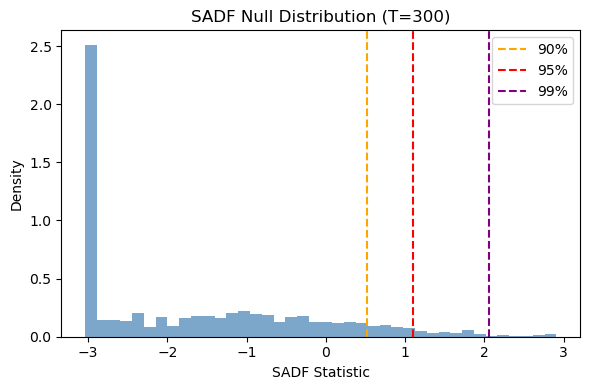

     Critical Value
90%        0.523103
95%        1.099307
99%        2.059425


beta =  [0.58727455]
alpha =  0.0132
ADF on residuals  stat = -13.616


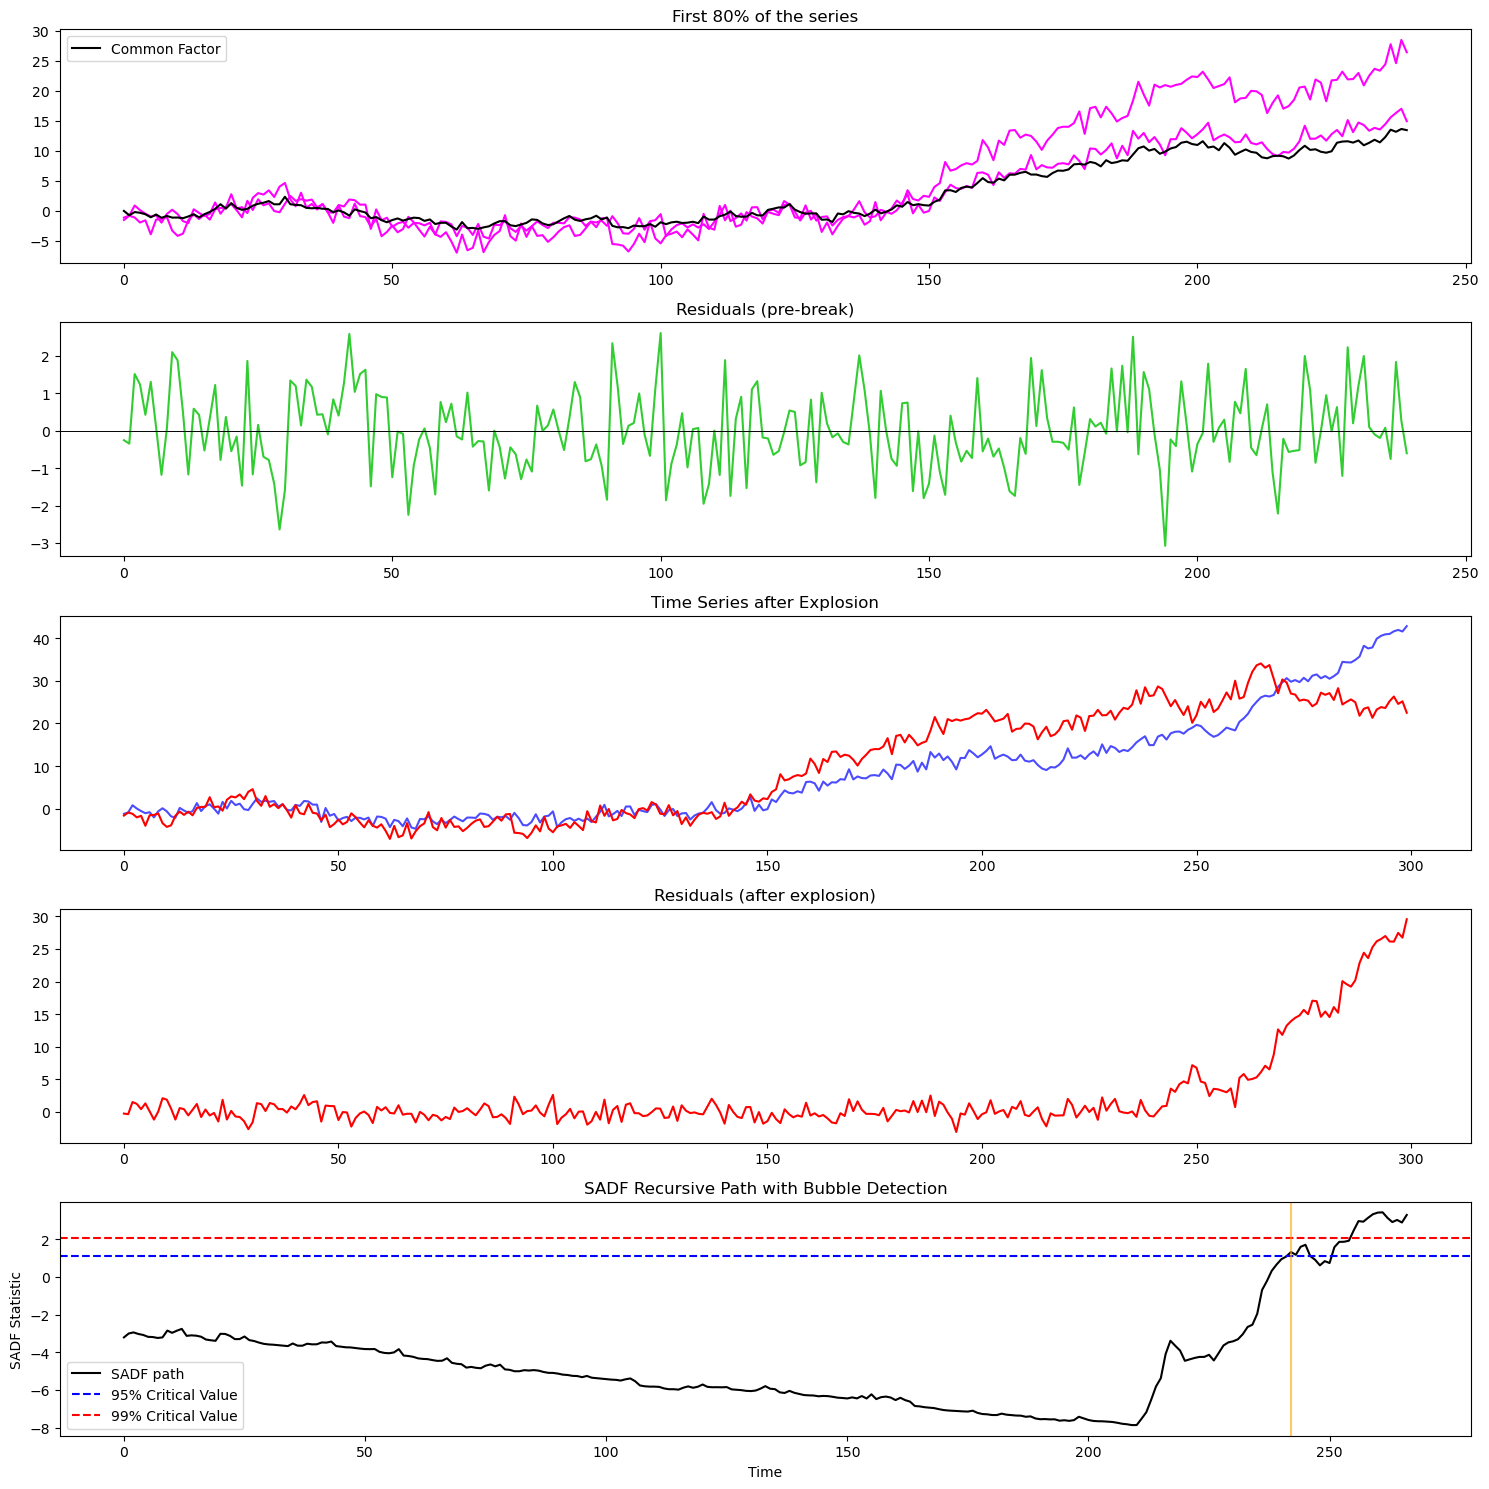

Time series is Explosive. SADF Value is: 3.43

Bubble starts at t=242
Multipliers: [1.2 2. ]


In [14]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")
""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

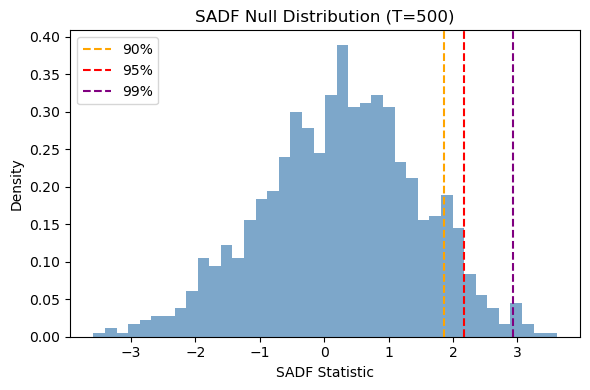

     Critical Value
90%        1.854043
95%        2.168752
99%        2.940054


beta =  [0.5760246]
alpha =  0.0027
ADF on residuals  stat = -12.145


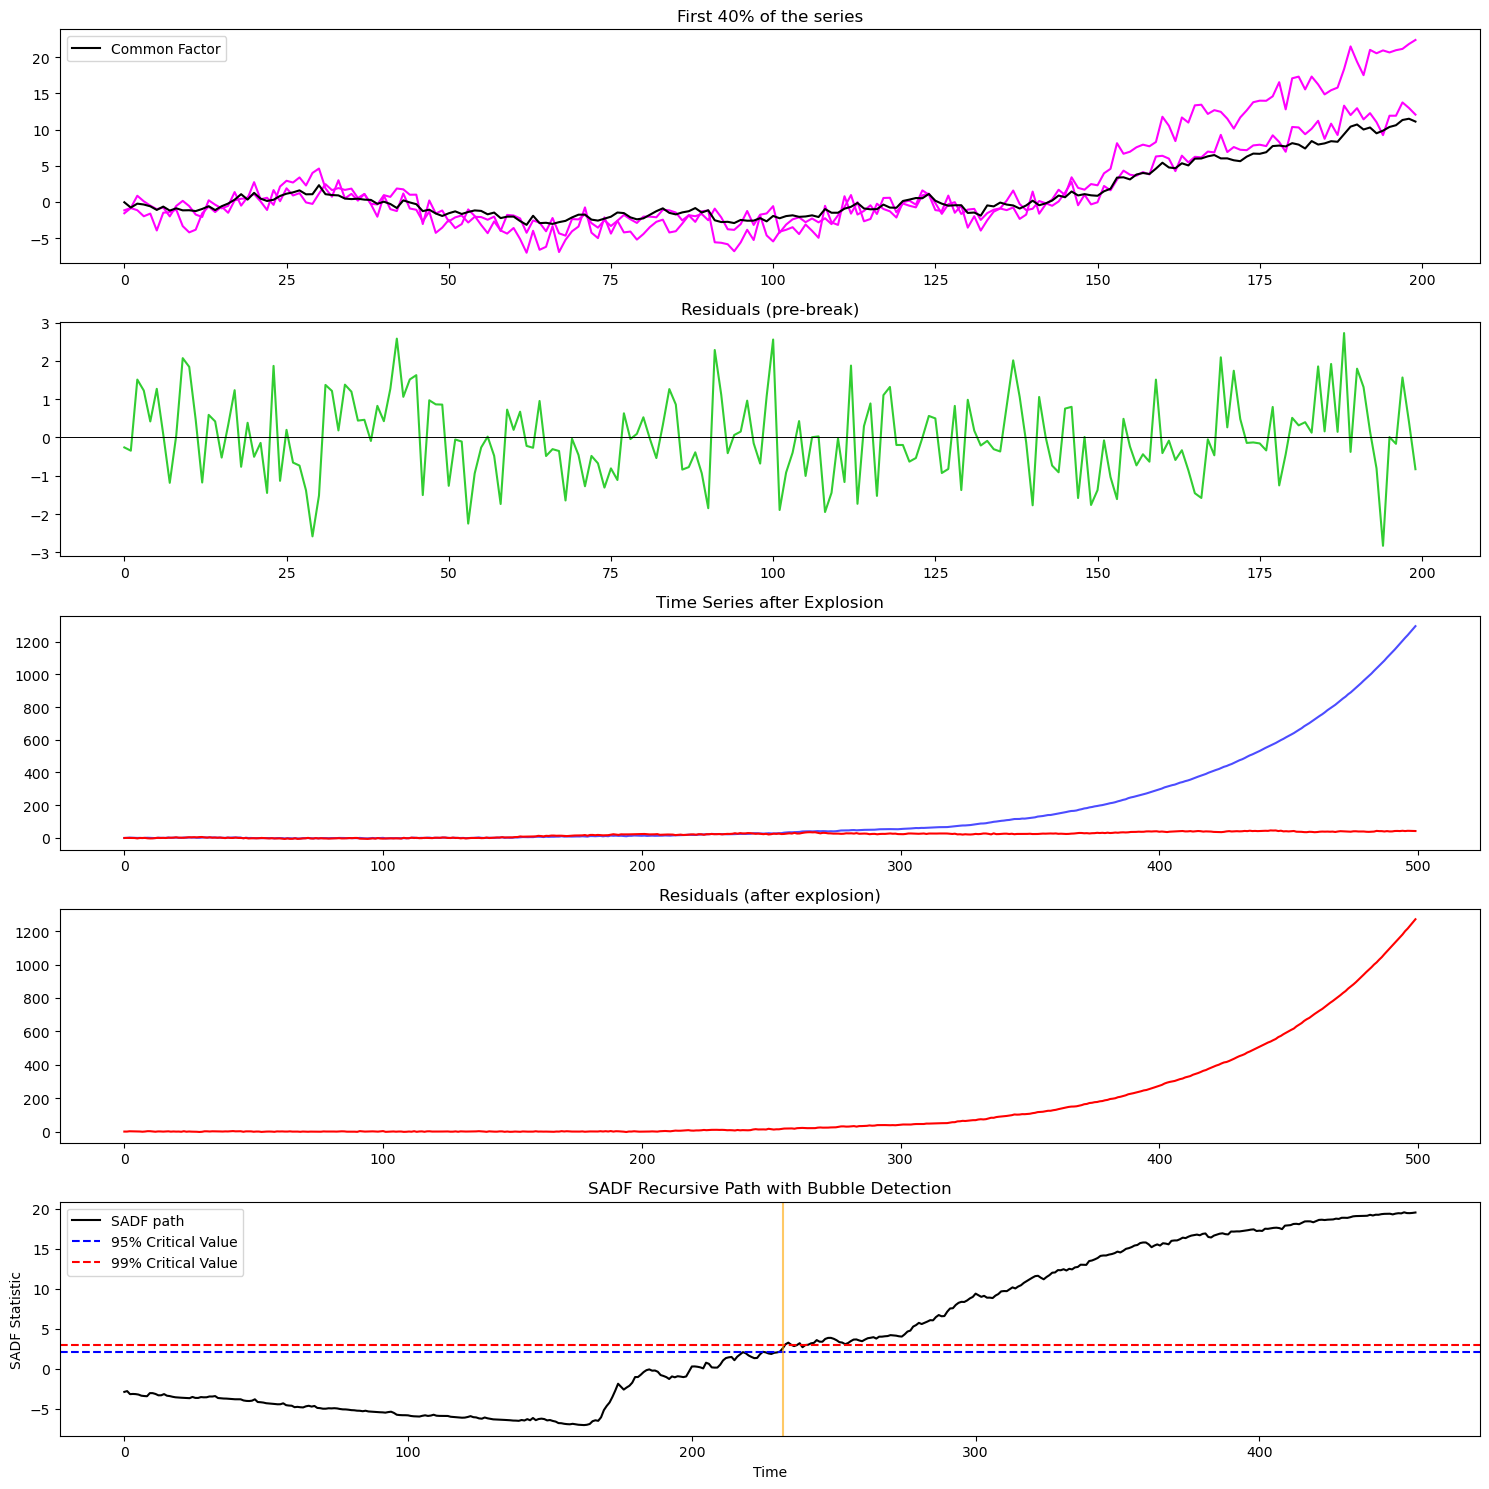

Time series is Explosive. SADF Value is: 19.58

Bubble starts at t=232
Multipliers: [1.2 2. ]


In [19]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [20]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

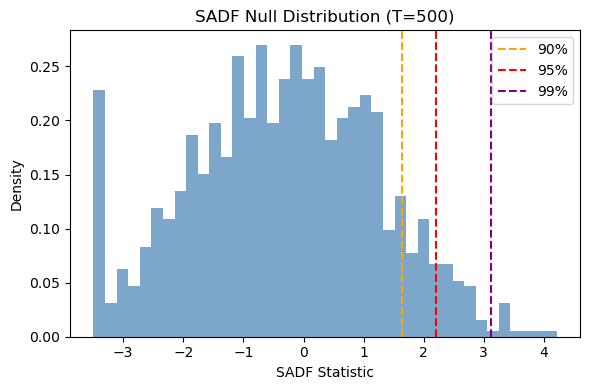

     Critical Value
90%        1.646462
95%        2.202659
99%        3.120375


beta =  [0.59700412]
alpha =  0.0074
ADF on residuals  stat = -16.107


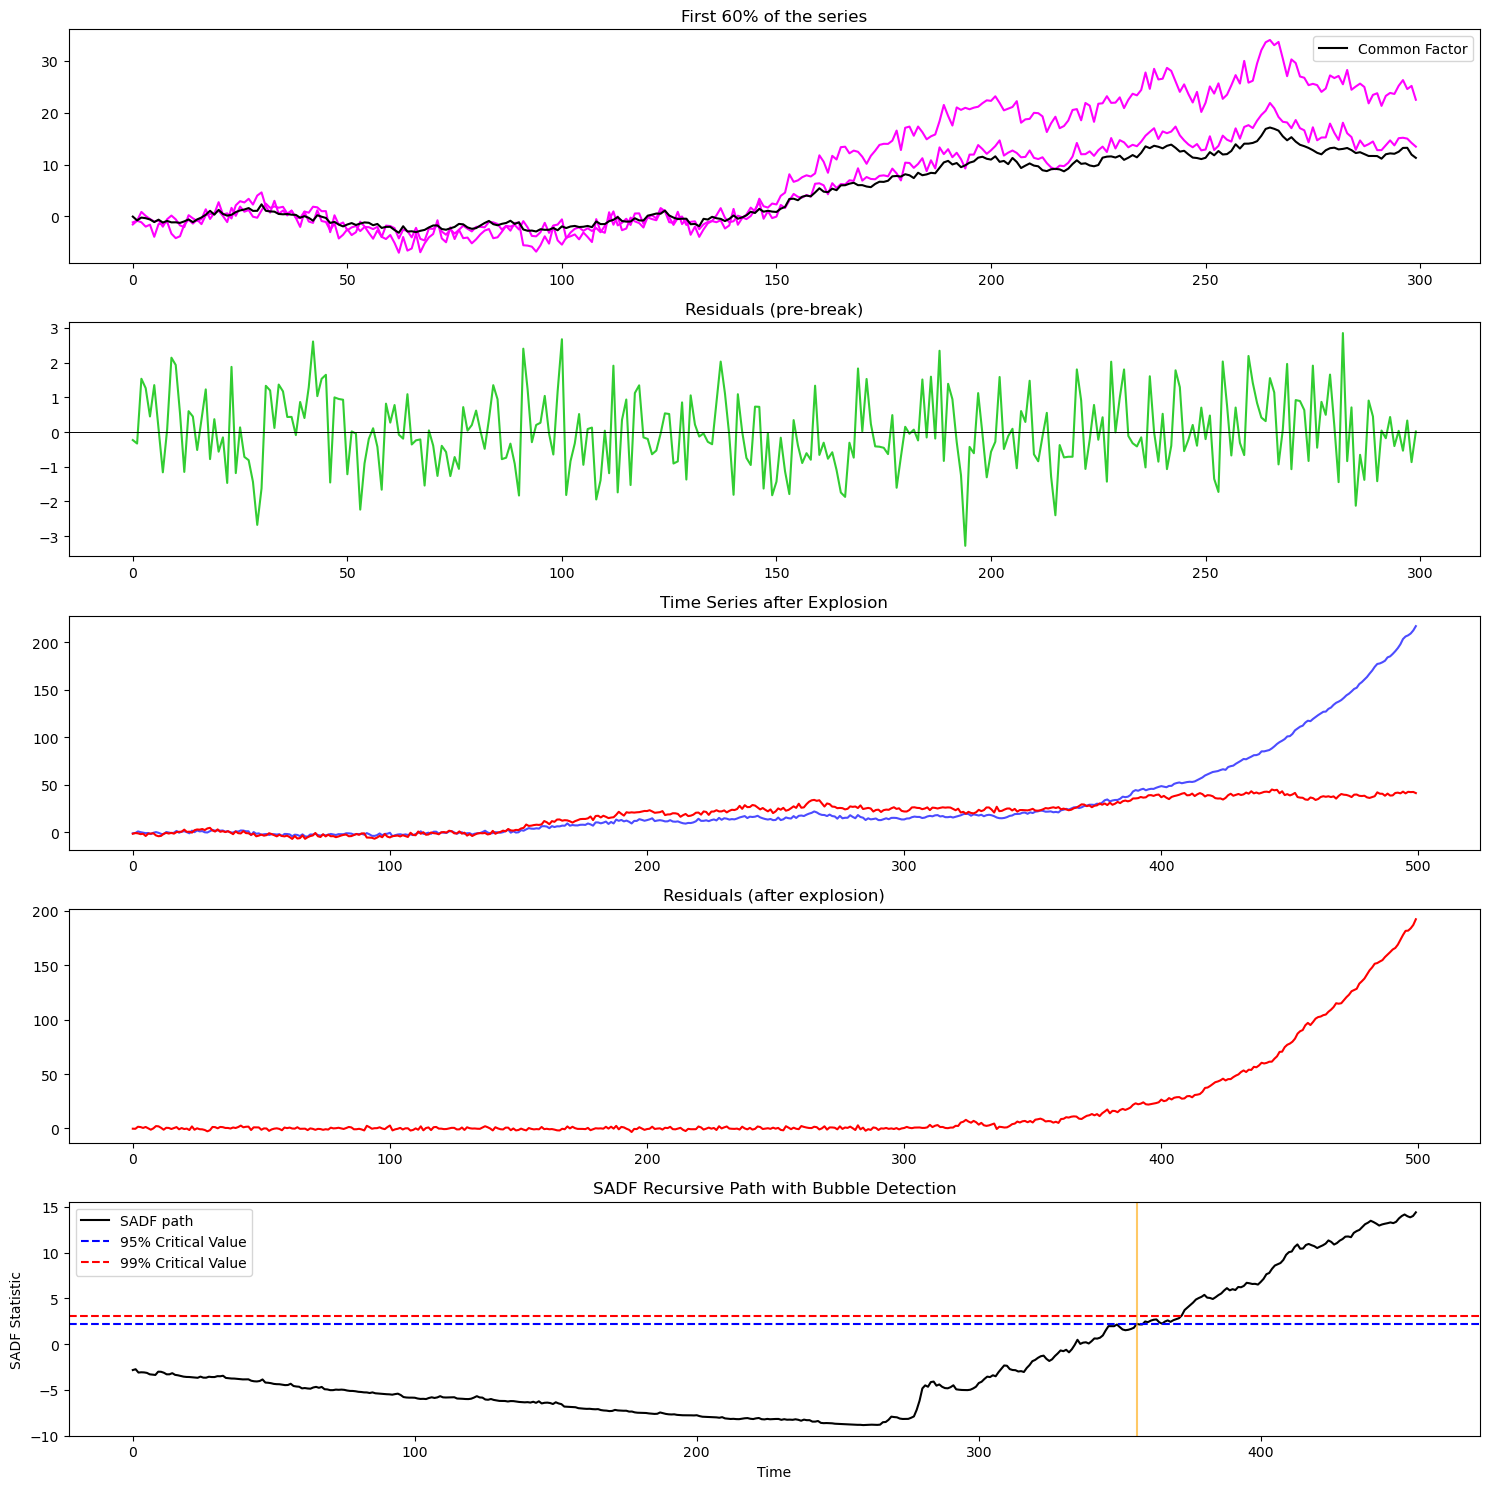

Time series is Explosive. SADF Value is: 14.41

Bubble starts at t=356
Multipliers: [1.2 2. ]


In [21]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [22]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

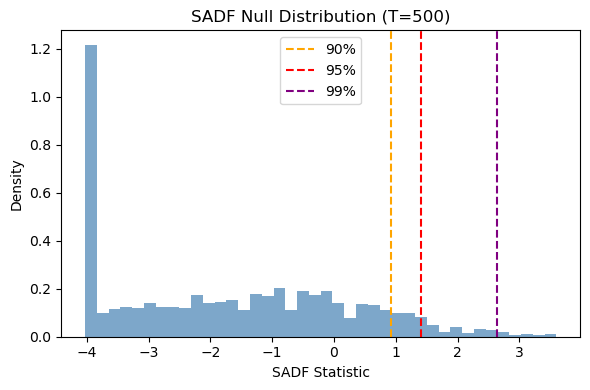

     Critical Value
90%        0.924760
95%        1.406120
99%        2.640196


beta =  [0.59679203]
alpha =  0.0164
ADF on residuals  stat = -20.142


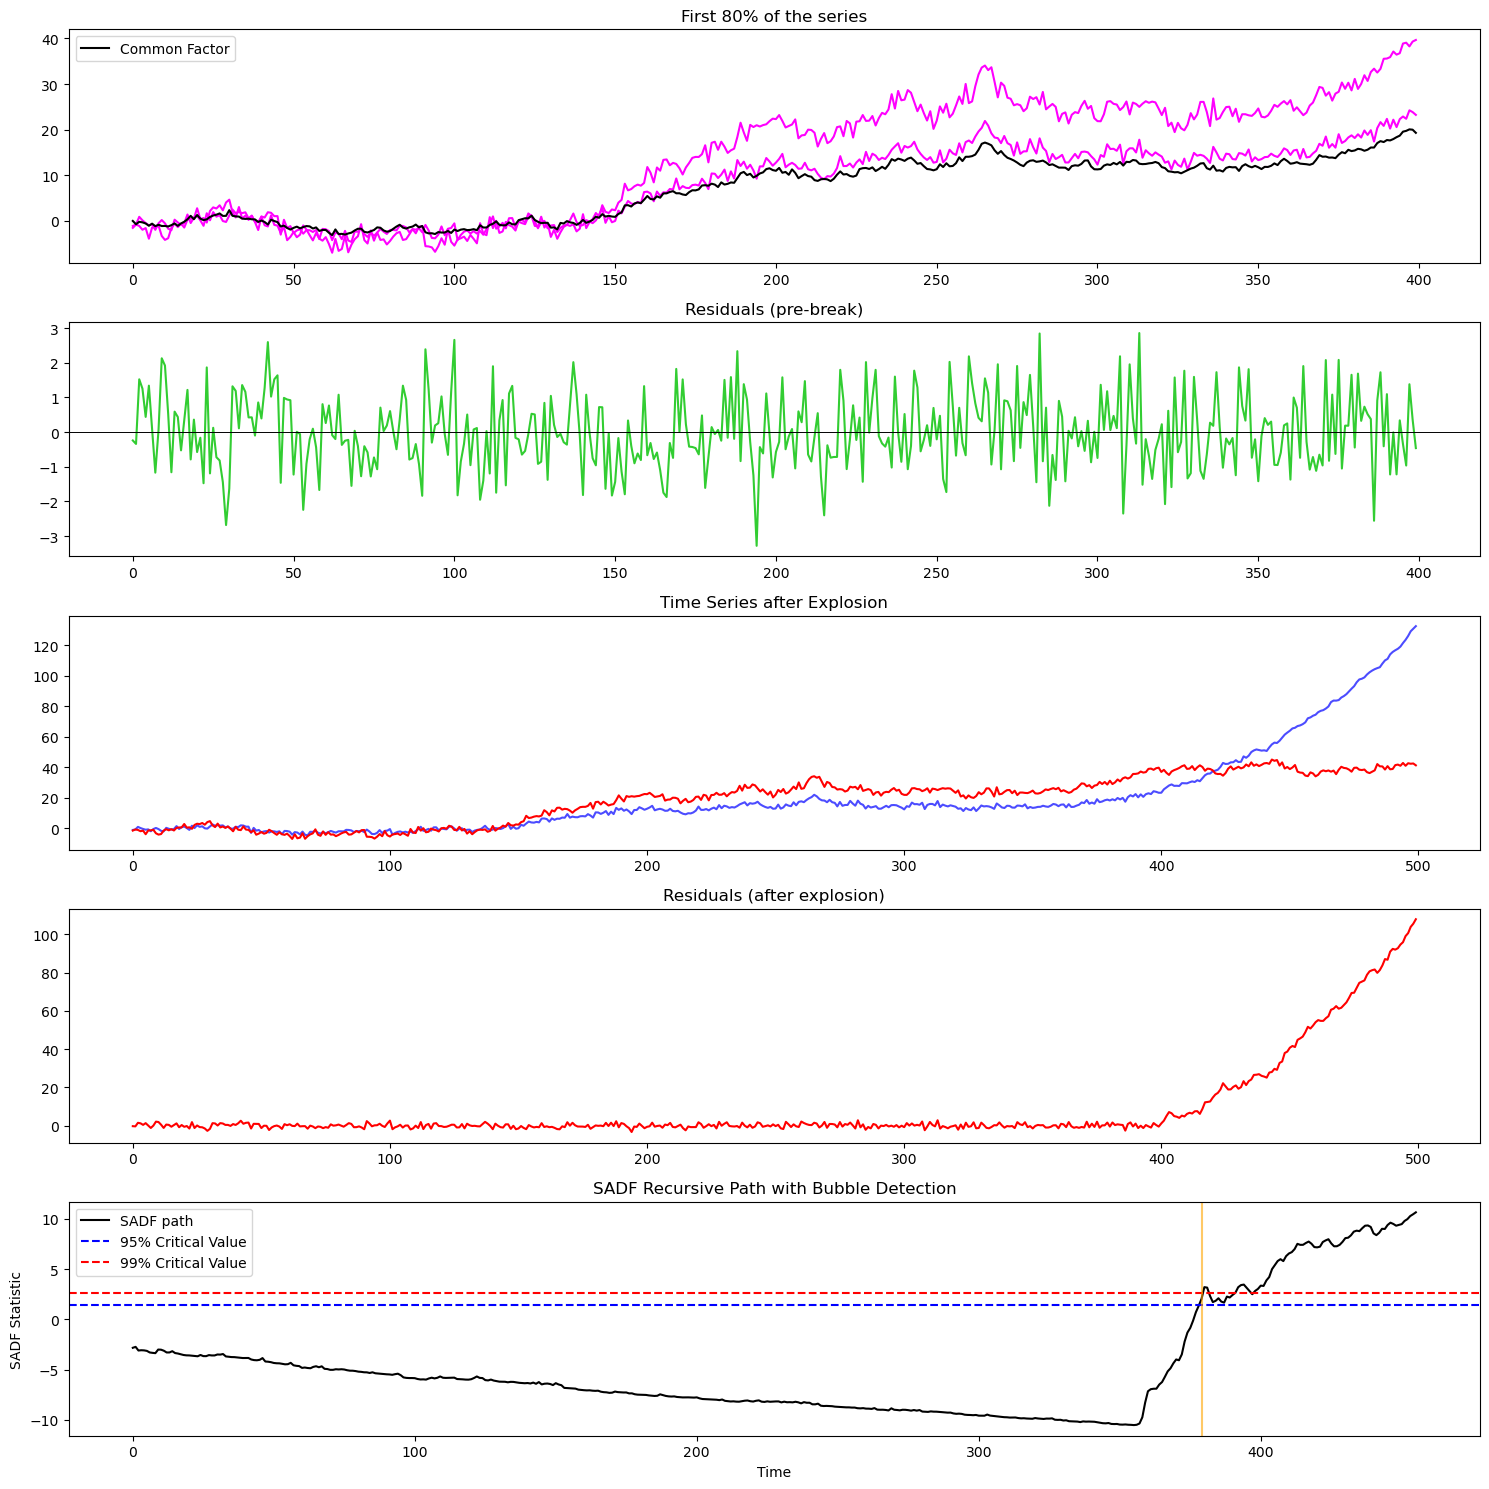

Time series is Explosive. SADF Value is: 10.66

Bubble starts at t=379
Multipliers: [1.2 2. ]


In [23]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [25]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [26]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [27]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

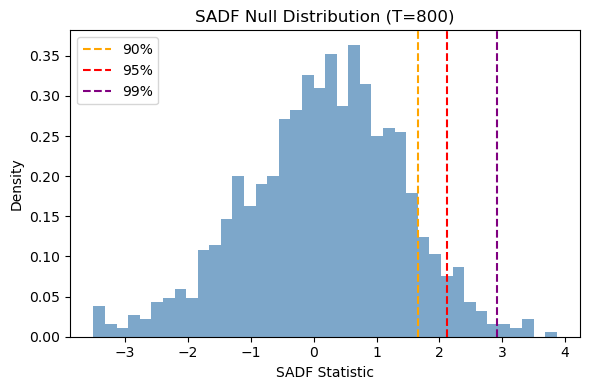

     Critical Value
90%        1.654920
95%        2.121221
99%        2.910165


beta =  [0.59753031]
alpha =  0.0095
ADF on residuals  stat = -17.114


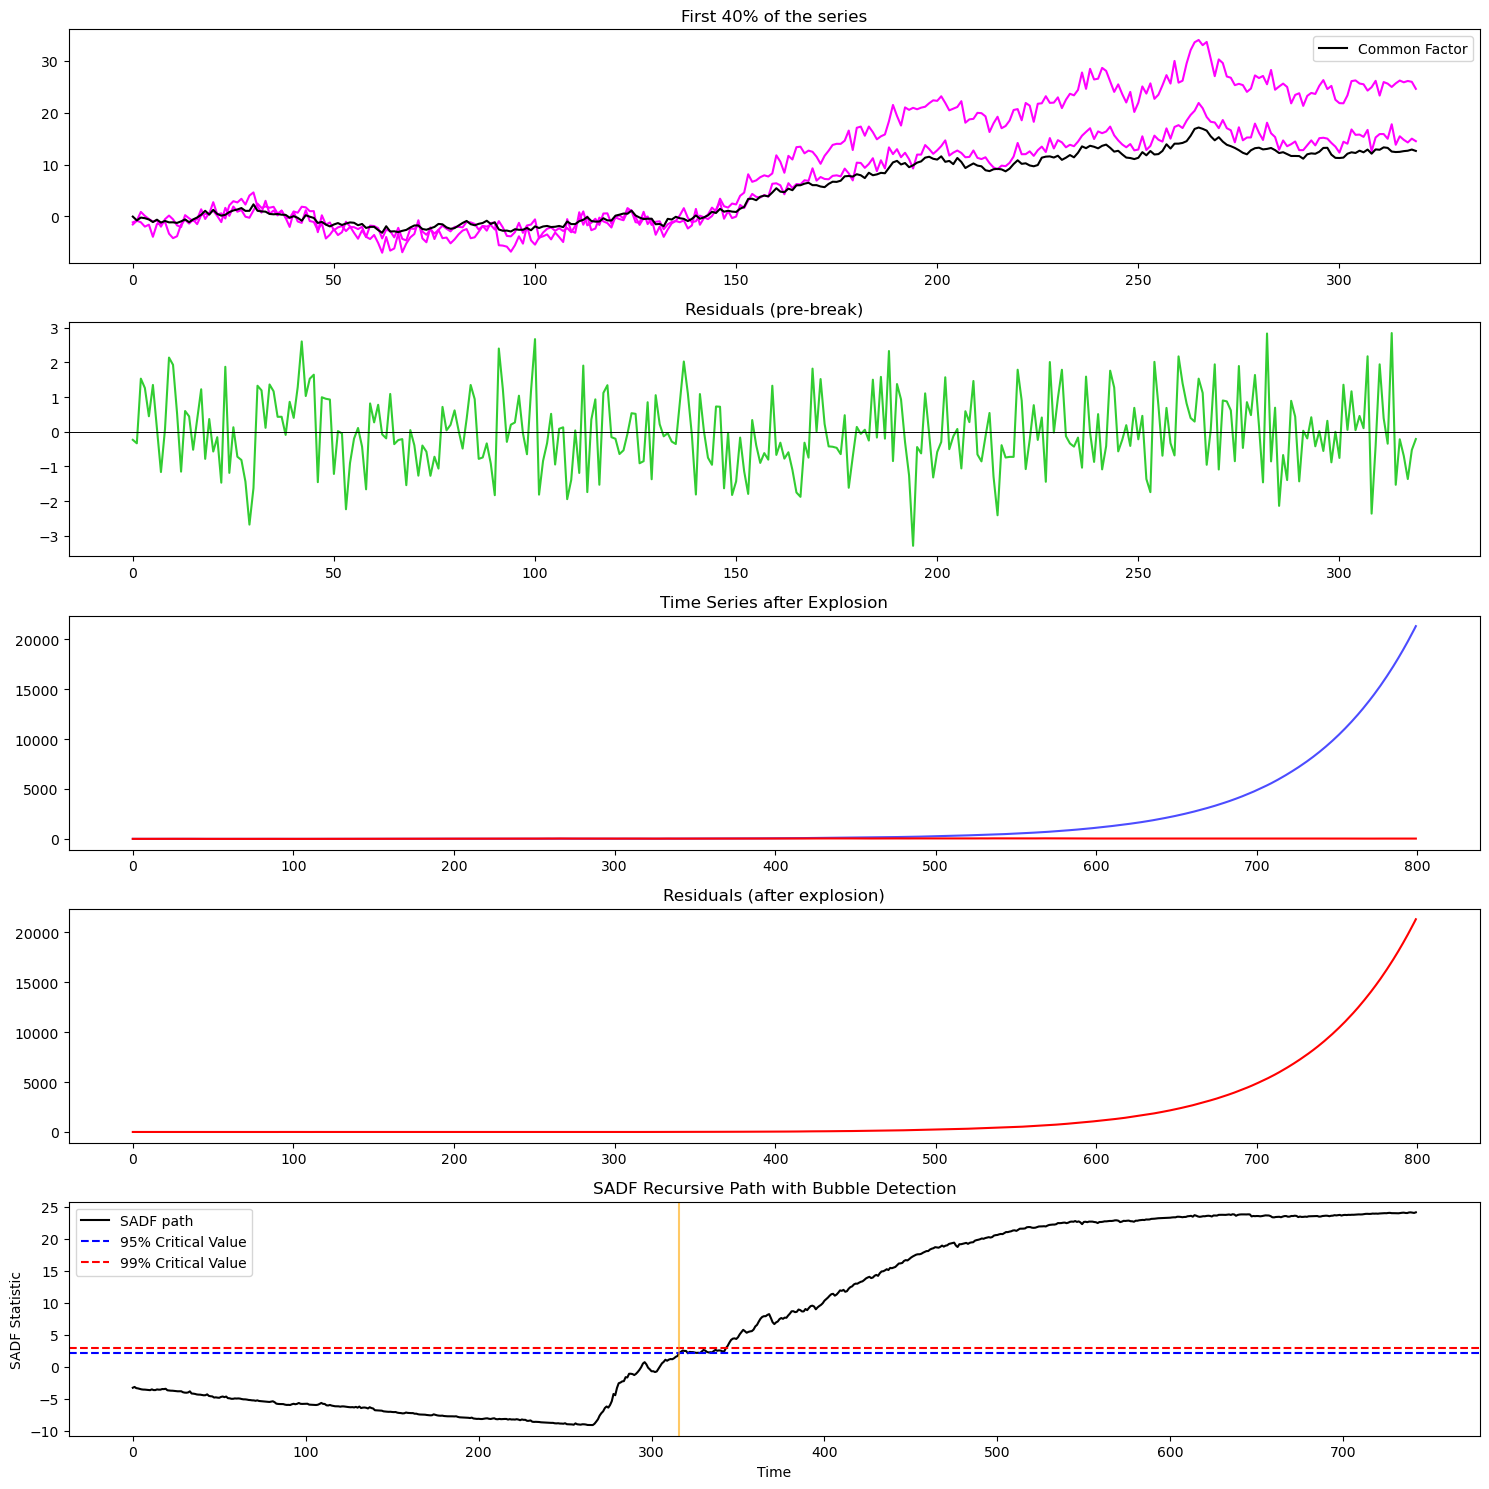

Time series is Explosive. SADF Value is: 24.17

Bubble starts at t=316
Multipliers: [1.2 2. ]


In [28]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [29]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

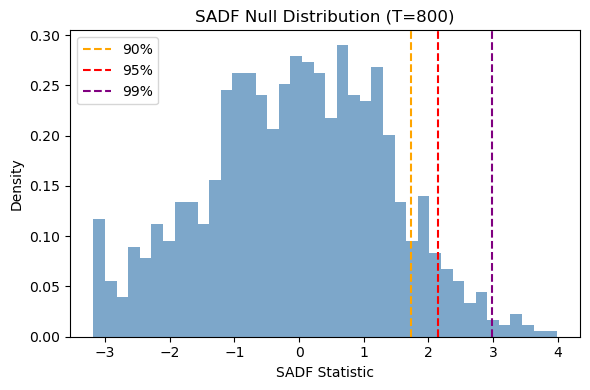

     Critical Value
90%        1.722446
95%        2.154841
99%        2.988711


beta =  [0.59776338]
alpha =  0.0104
ADF on residuals  stat = -22.453


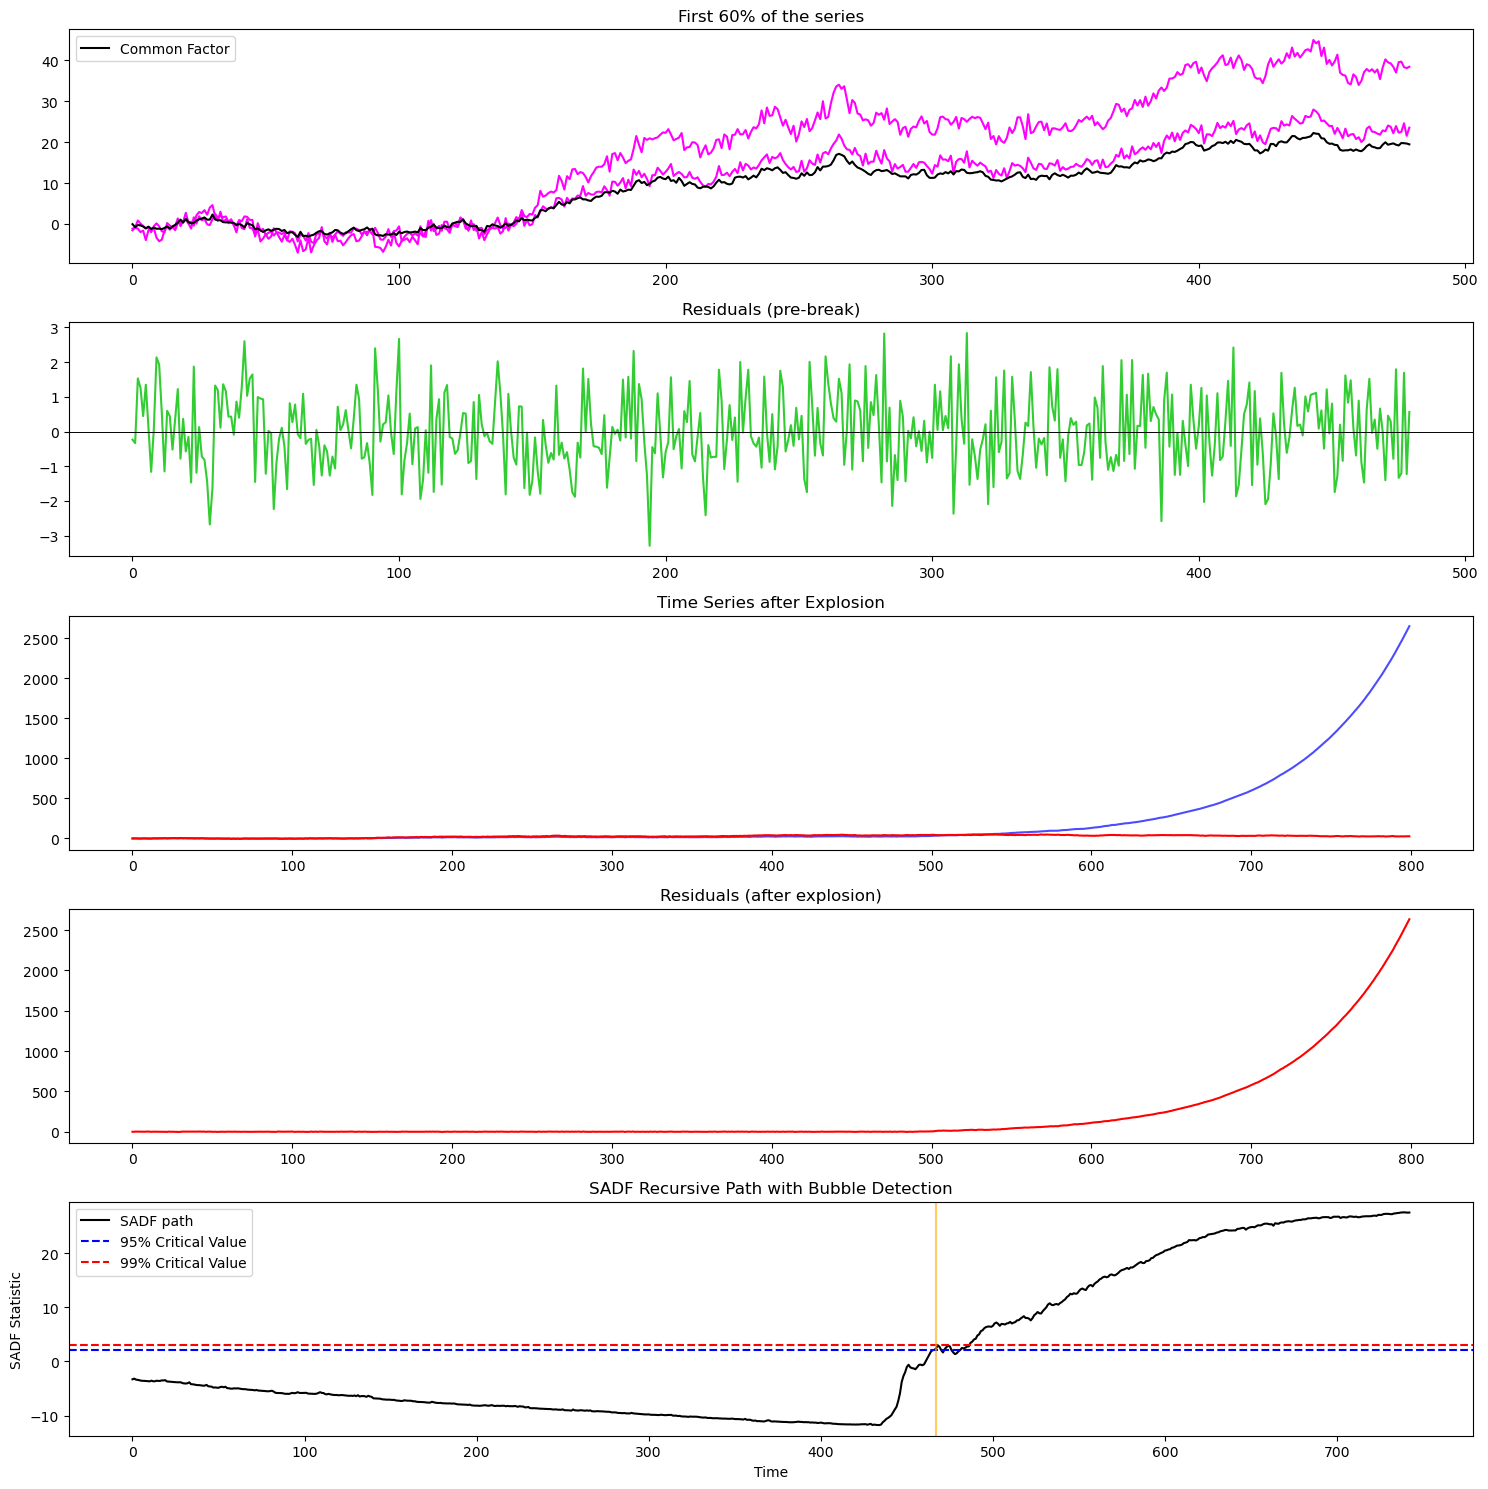

Time series is Explosive. SADF Value is: 27.57

Bubble starts at t=467
Multipliers: [1.2 2. ]


In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [31]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

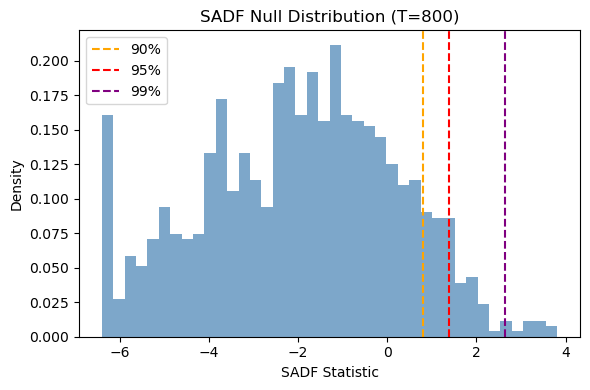

     Critical Value
90%        0.804170
95%        1.394825
99%        2.643087


beta =  [0.59854625]
alpha =  0.01
ADF on residuals  stat = -26.201


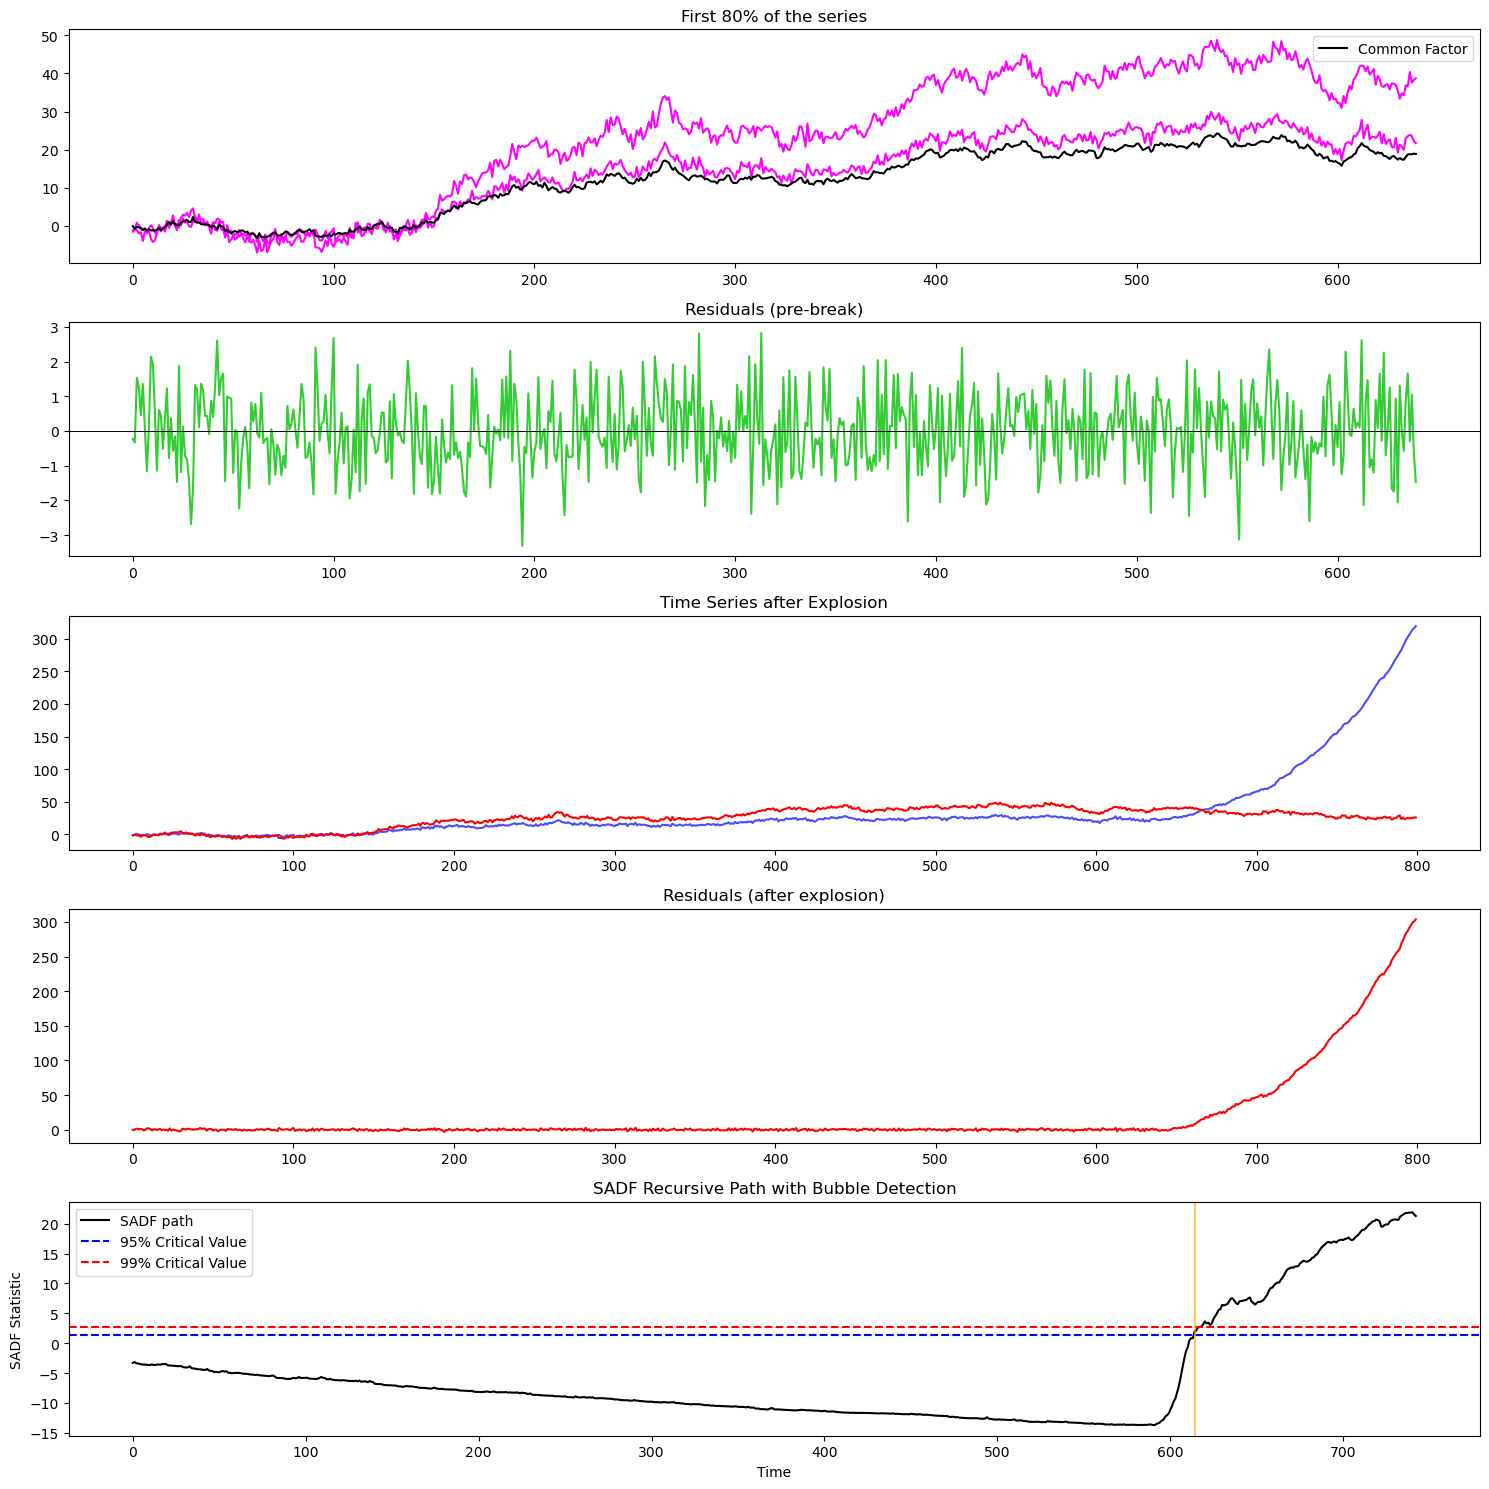

Time series is Explosive. SADF Value is: 21.89

Bubble starts at t=614
Multipliers: [1.2 2. ]


In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

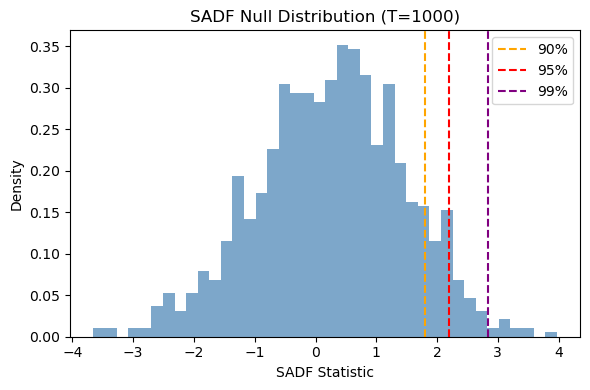

     Critical Value
90%        1.794308
95%        2.191531
99%        2.843206


beta =  [0.59679203]
alpha =  0.0164
ADF on residuals  stat = -20.142


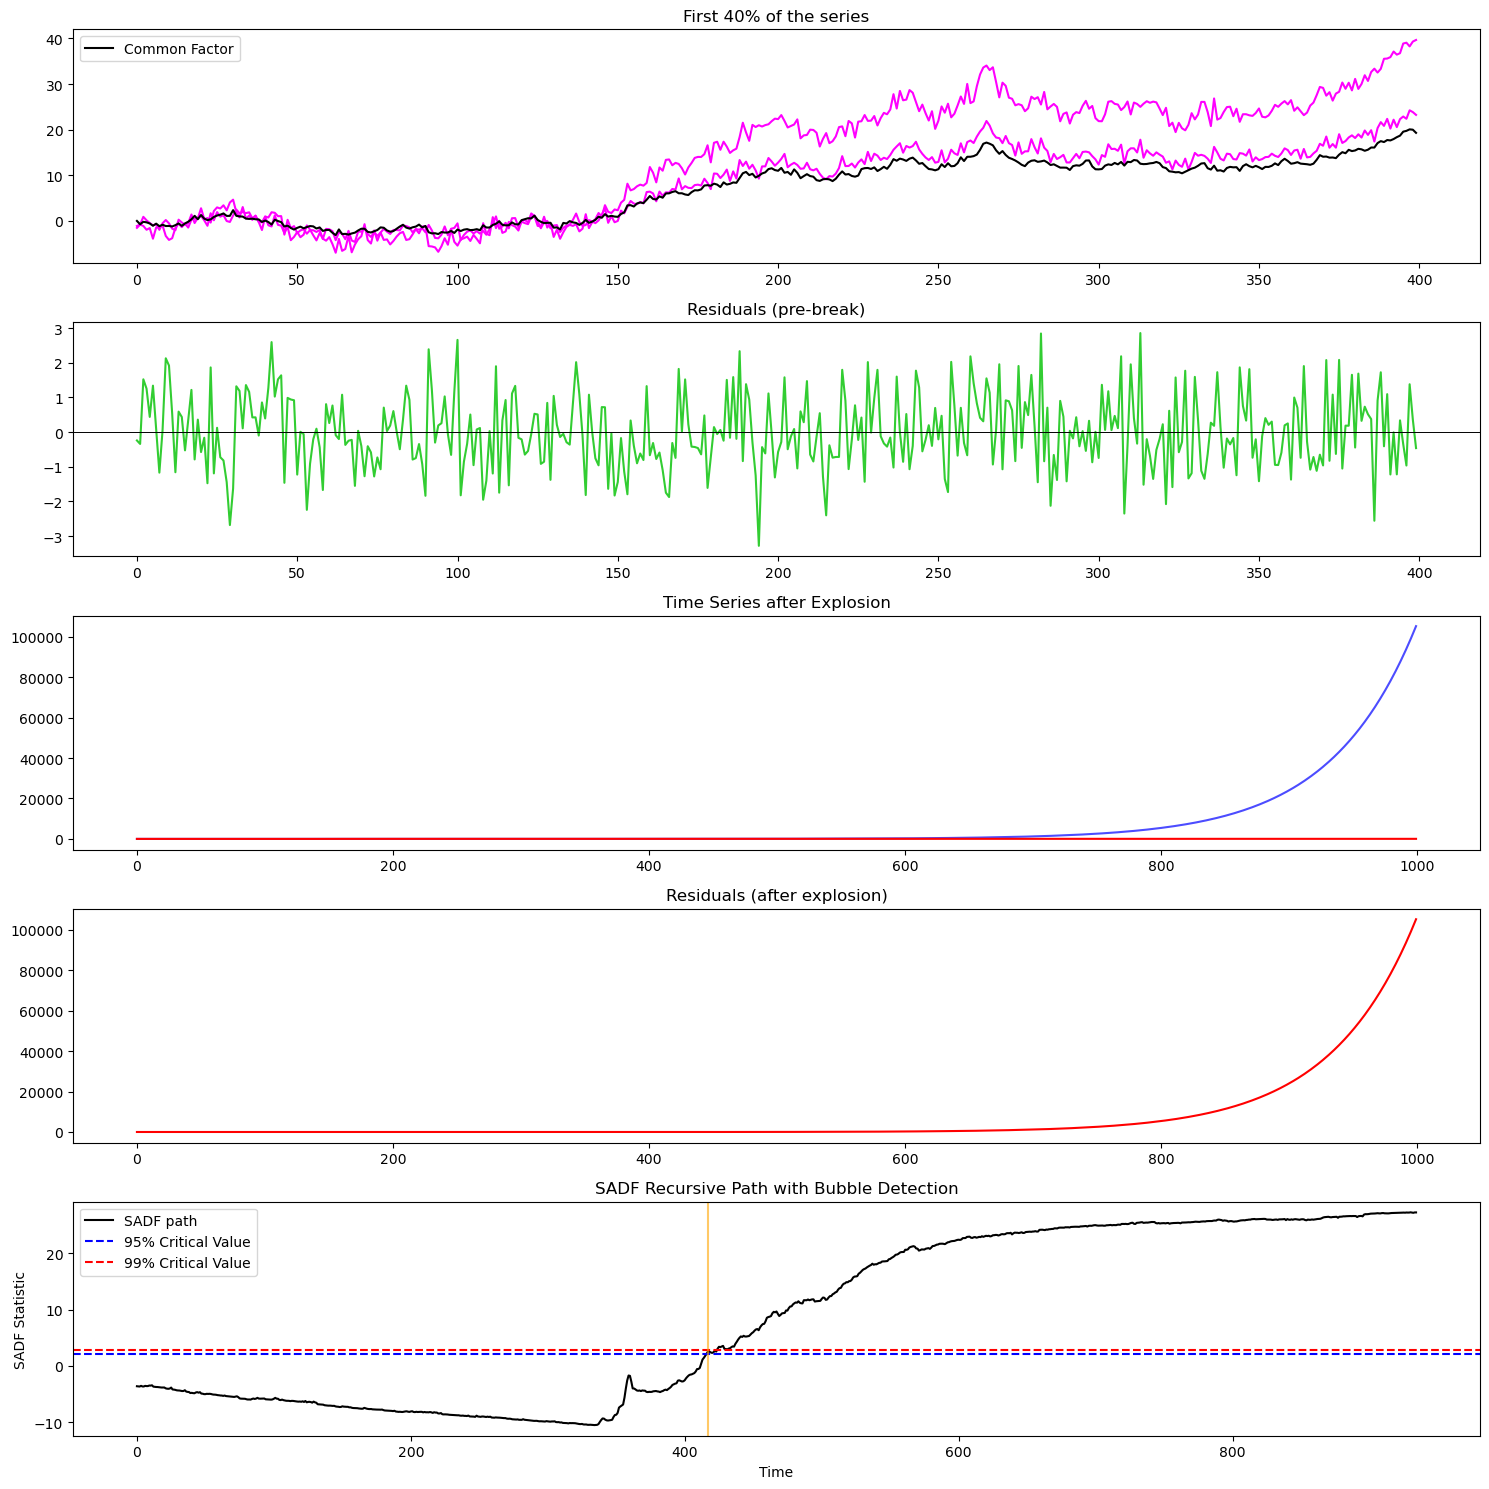

Time series is Explosive. SADF Value is: 27.29

Bubble starts at t=417
Multipliers: [1.2 2. ]


In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [38]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

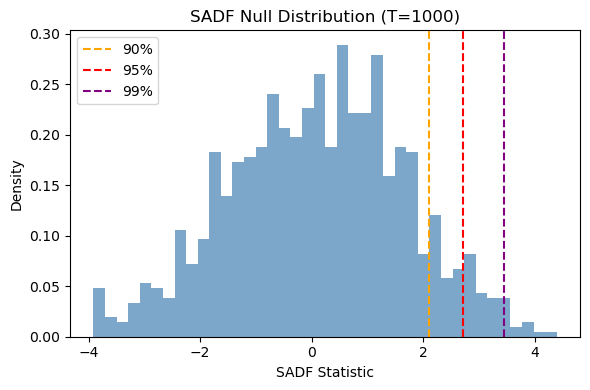

     Critical Value
90%        2.106025
95%        2.710800
99%        3.442229


beta =  [0.5981736]
alpha =  0.0104
ADF on residuals  stat = -24.950


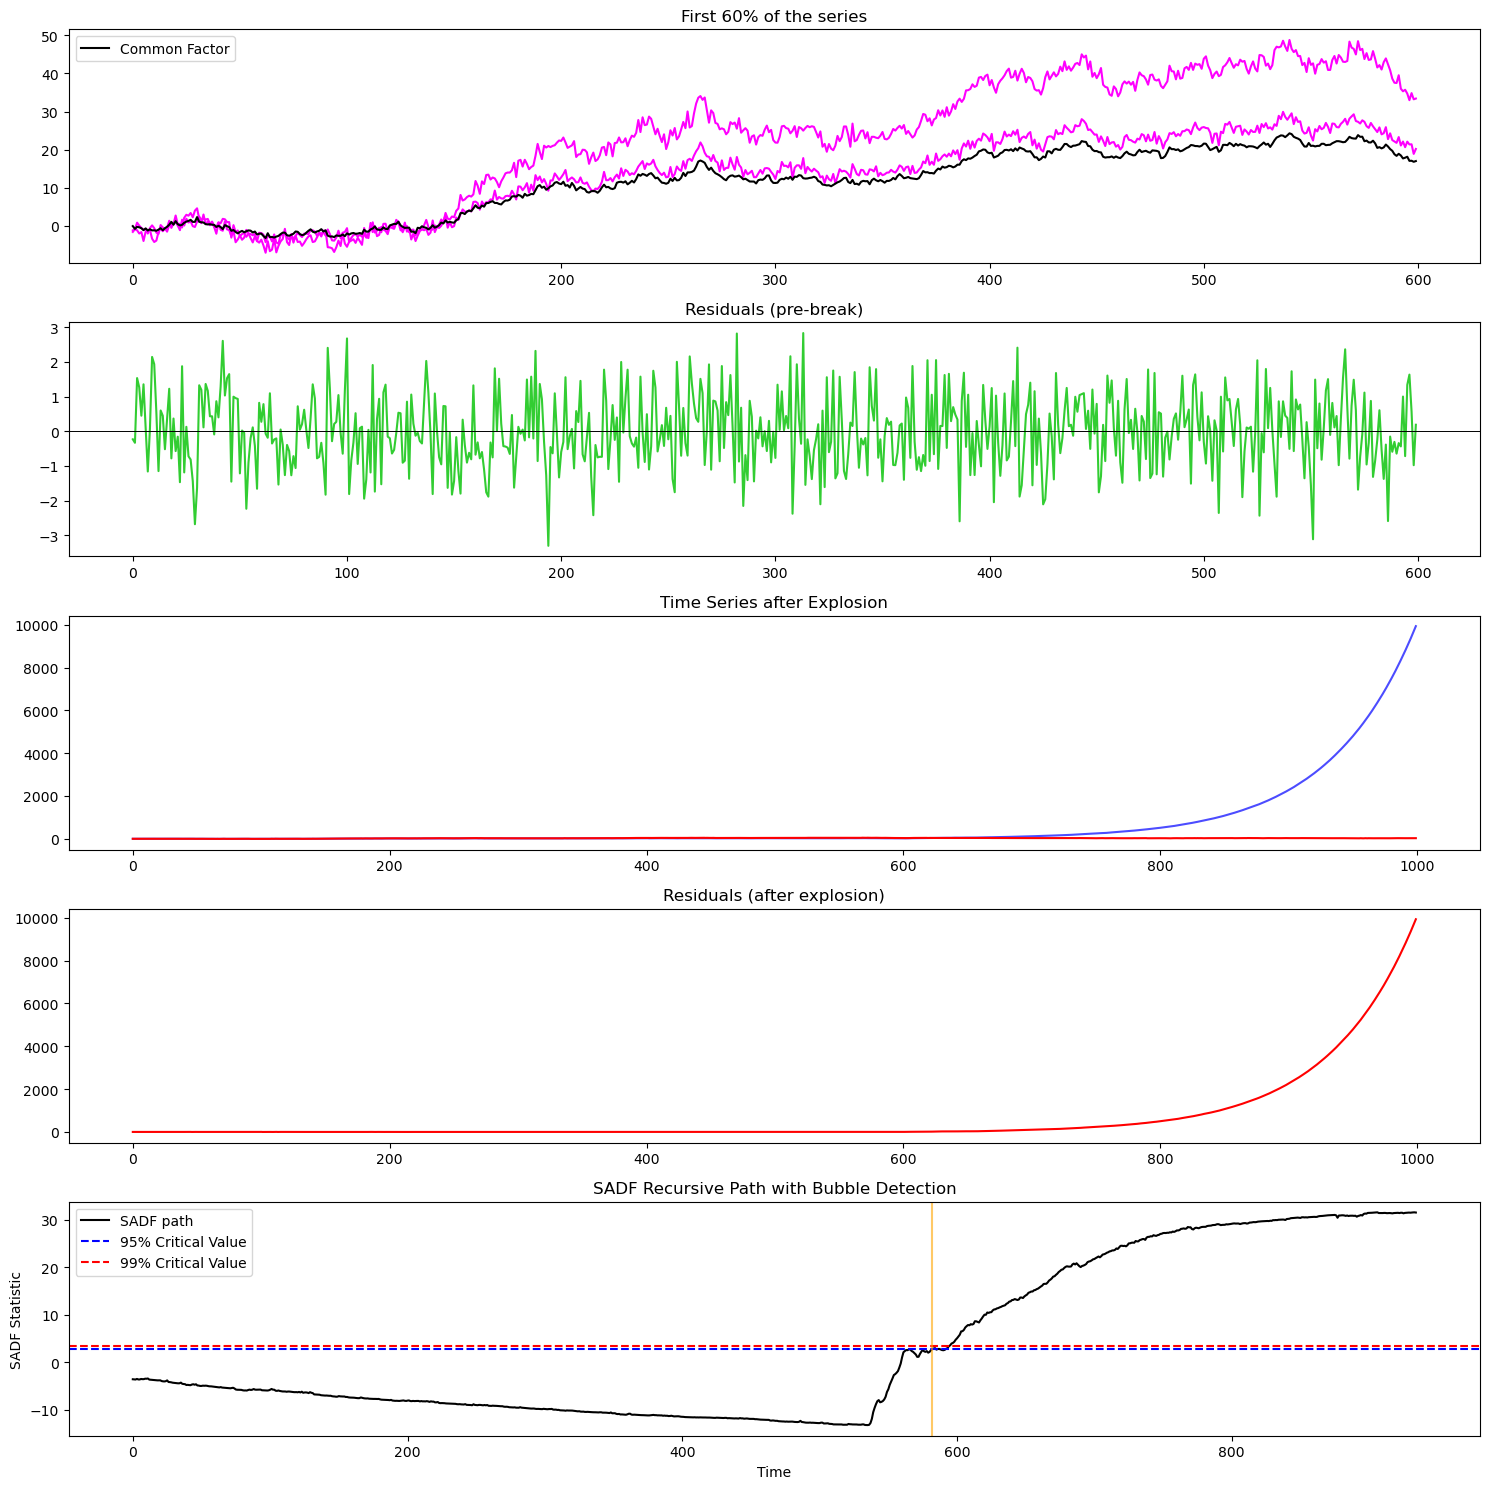

Time series is Explosive. SADF Value is: 31.56

Bubble starts at t=582
Multipliers: [1.2 2. ]


In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

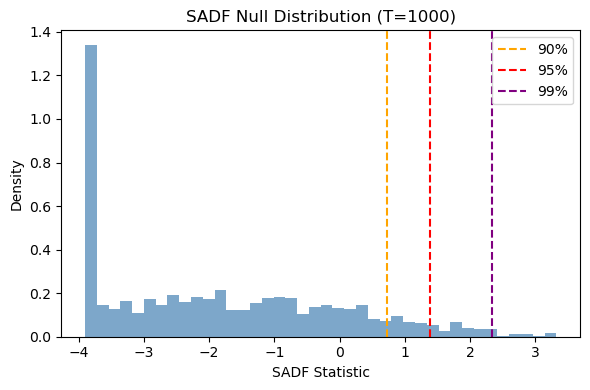

     Critical Value
90%        0.727350
95%        1.388880
99%        2.329682


beta =  [0.59860865]
alpha =  0.0062
ADF on residuals  stat = -29.065


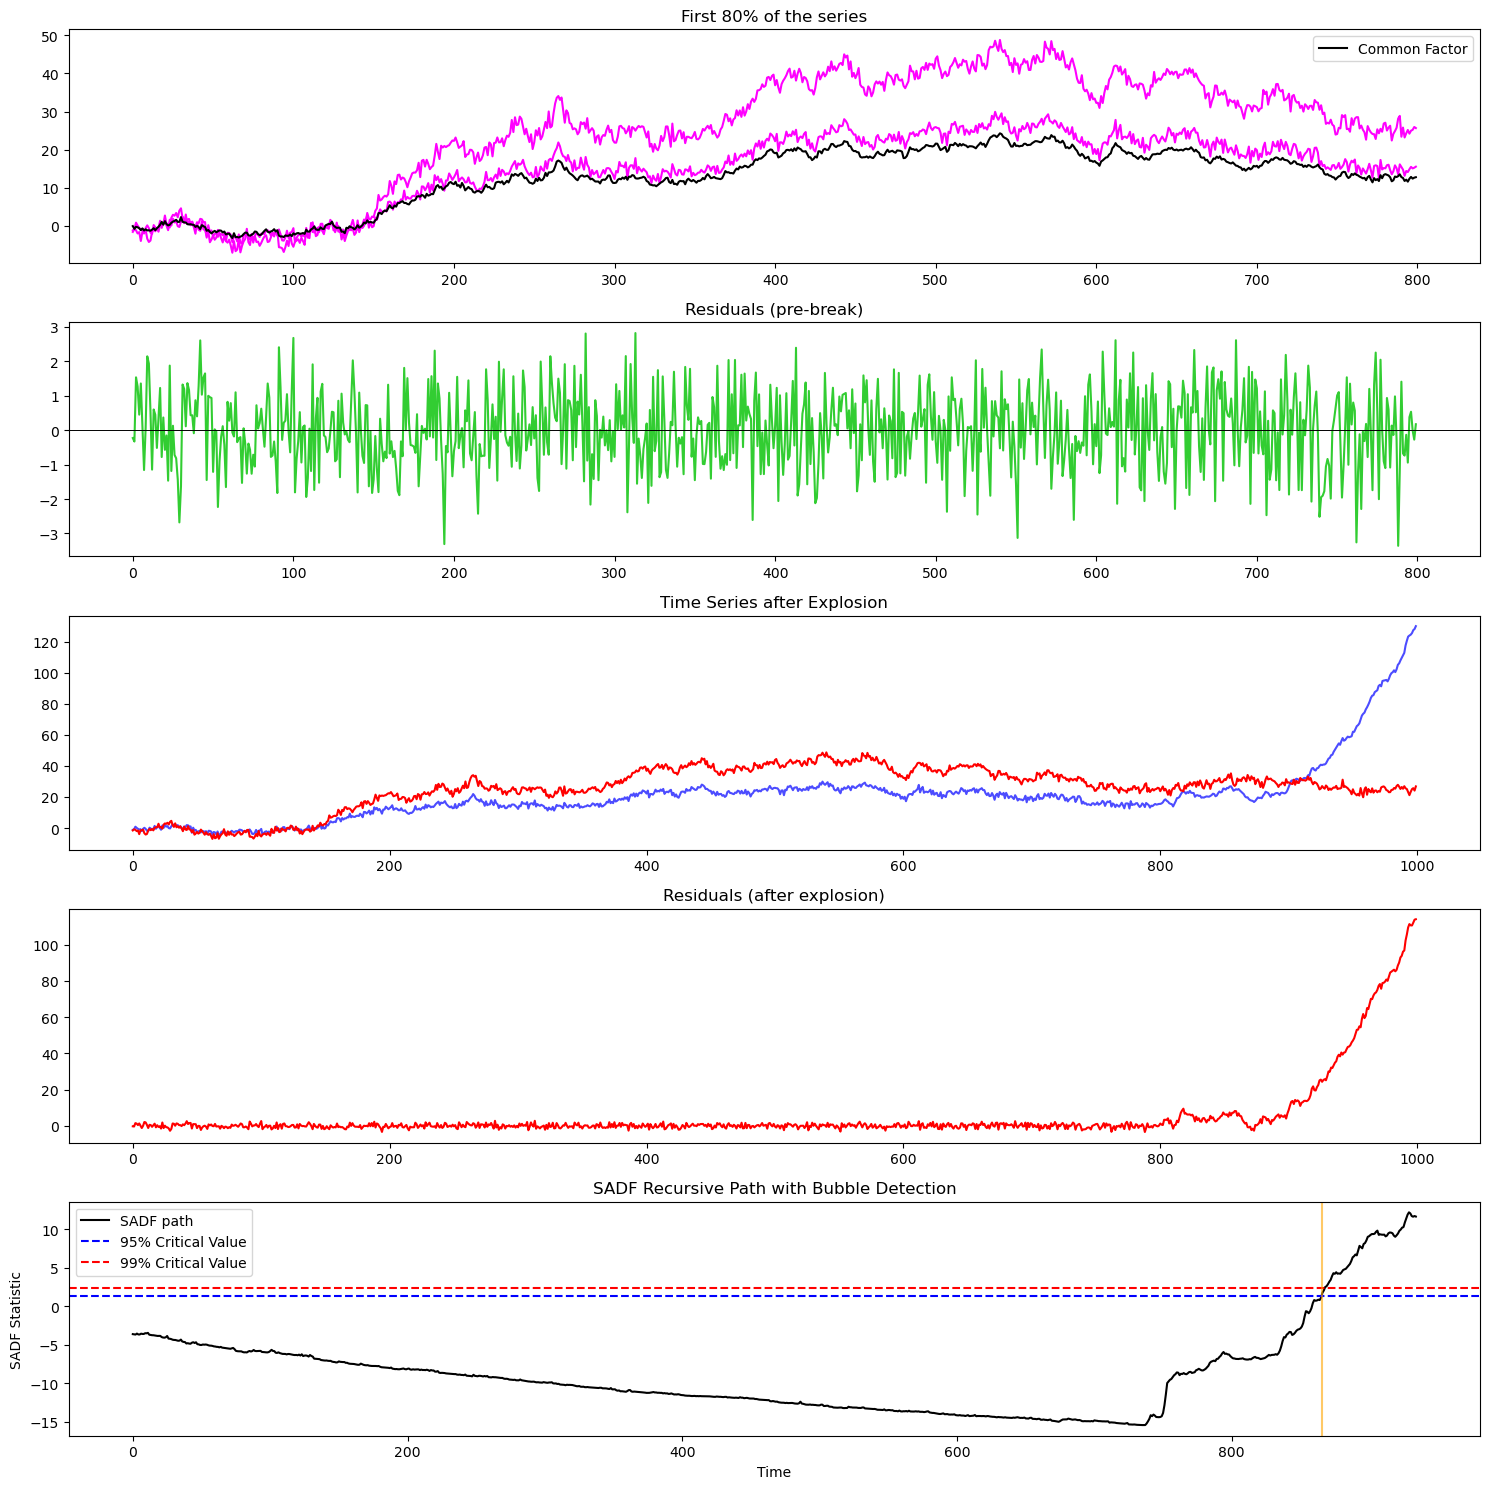

Time series is Explosive. SADF Value is: 12.2

Bubble starts at t=866
Multipliers: [1.2 2. ]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [42]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment.csv", index=False)